In [110]:
import pandas as pd
listings = pd.read_csv("listings.csv")
listings.dropna(axis=1)

listings = listings[['id', 'name','host_since',
       'host_response_time', 'host_response_rate',
       'host_is_superhost','host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

In [111]:
import os
import pandas as pd

def read_csv_files_in_folder(folder_path):
    # Get a list of all files in the folder
    file_list = [file for file in os.listdir(folder_path) if file.lower().endswith('.csv')]

    # Check if there are any CSV files in the folder
    if not file_list:
        raise ValueError(f"No CSV files found in the folder '{folder_path}'.")

    # Read and concatenate the CSV files
    dfs = []
    for file in file_list:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Add a 'sensor' column with the name of the file
        df['sensor'] = os.path.splitext(file)[0]
        
        dfs.append(df)

    concatenated_df = pd.concat(dfs, ignore_index=True)

    return concatenated_df

In [112]:
Noise = read_csv_files_in_folder("C:\\Users\\santi\\OneDrive\\Desktop\\Flags\\Capstone\\Noise sensors")

In [113]:
Air = read_csv_files_in_folder("C:\\Users\\santi\\OneDrive\\Desktop\\Flags\\Capstone\\Air sensors")

In [114]:
Air = Air.dropna(axis=1)
Air

,Date and Time,PM<sub>10</sub>,PM<sub>2.5</sub>,sensor
0,2023-11-15 00:00:00,27.64,17.56,Ballyfermot
1,2023-11-16 00:00:00,25.57,17.41,Ballyfermot
2,2023-11-17 00:00:00,14.13,7.06,Ballyfermot
3,2023-11-18 00:00:00,8.86,5.68,Ballyfermot
4,2023-11-19 00:00:00,7.95,5.01,Ballyfermot
...,...,...,...,...
548,2023-12-11 00:00:00,7.50,6.52,Walkinstown library
549,2023-12-12 00:00:00,8.17,7.06,Walkinstown library
550,2023-12-13 00:00:00,5.34,3.80,Walkinstown library
551,2023-12-14 00:00:00,16.85,14.46,Walkinstown library


In [115]:
Attributes_by_Sensor = Noise.groupby('sensor')['LAeq'].agg(['mean', 'max','min','var'])

In [116]:
Attributes_by_Sensor_air = Air.groupby('sensor')[['PM<sub>10</sub>','PM<sub>2.5</sub>']].agg(['mean', 'max','min','var'])
Attributes_by_Sensor_air

PM<sub>10</sub>                          \
                                   mean    max   min        var   
sensor                                                            
Ballyfermot                   13.994516  27.64  3.68  47.585086   
Cabra community college        7.765806  18.69  2.70  13.989438   
Coolock                        8.952258  16.39  2.96  15.532378   
Custom house quay             13.267419  24.80  5.09  26.376166   
Davitt Road                   14.969032  29.44  3.34  63.549249   
Donnybrook fire station       10.396129  25.30  4.13  20.435691   
Dublin port                   20.784194  41.69  6.19  78.362492   
Finglas                       12.082903  27.08  3.97  34.877641   
Lord edward street             8.799677  18.30  3.43  14.190763   
Marino                        14.870323  35.17  4.98  48.611163   
Mount joy square              14.328710  29.85  4.52  42.452198   
Phoenix park                  10.280323  22.18  3.48  18.340550   
Rathmines                     15.963548  36.96  4.99  69.194004   
Ringsend                      15.158065  39.24  4.96  57.929783   
ST johns road west            15.092903  34.34  5.11  47.462008   
Sandynount green              16.050645  27.78  8.05  35.144273   
St anne's park                11.971290  22.05  4.19  23.831618   
Walkinstown library            8.114231  16.85  3.10  16.415977   

                        PM<sub>2.5</sub>                          
                                    mean    max   min        var  
sensor                                                            
Ballyfermot                     9.484839  22.11  2.48  32.097186  
Cabra community college         5.895484  12.55  2.00   8.913646  
Coolock                         7.340645  14.13  2.37  12.241040  
Custom house quay               8.881935  16.48  3.17  12.181049  
Davitt Road                     9.554194  23.10  2.30  36.068332  
Donnybrook fire station         7.457419  13.94  2.63   7.545173  
Dublin port                    10.702258  23.78  4.36  27.482978  
Finglas                         8.178065  20.59  2.60  22.297749  
Lord edward street              6.811613  13.42  2.60   9.498654  
Marino                         10.027419  28.01  3.12  34.262880  
Mount joy square                9.379355  22.24  2.41  27.868866  
Phoenix park                    6.601613  16.22  2.17  11.435394  
Rathmines                      11.029677  28.91  2.82  54.761623  
Ringsend                        8.138065  18.79  2.42  16.499936  
ST johns road west              9.565806  24.99  3.04  30.666072  
Sandynount green               12.836129  20.06  7.08  12.284045  
St anne's park                  7.789677  18.70  2.52  16.573843  
Walkinstown library             6.728462  14.46  2.43  13.641022

In [117]:
Locations_Air = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\Flags\\Capstone\\locations air.csv")
Air_sensors = pd.merge(Attributes_by_Sensor_air, Locations_Air, on='sensor')

C:\Users\santi\AppData\Local\Temp\ipykernel_51088\1813605763.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  Air_sensors = pd.merge(Attributes_by_Sensor_air, Locations_Air, on='sensor')


In [118]:
Locations_Noise = pd.DataFrame({
    'sensor': ['Ballymun', 'Bellyfermot civic center', 'Blessington basin', 'Chancery park', 'DCC Rowing club',
               'Dolphins barn', 'Drumcondra_library', 'Mellow park', 'Navan road', 'Raheny', 'Ringsend sport centre',
               'Strand road', 'Walkinstown', 'Woodstock gardens'],
    'latitude': [53.390919, 53.343215, 53.357244, 53.34652902870364, 53.346158, 53.331141895990676, 53.36989148853905,
                 53.390391, 53.370806, 53.380108, 53.340236666389245, 53.32797988955187, 53.319599730384574, 53.32354934764496],
    'longitude': [-6.265741, -6.362101, -6.271011, -6.27222408906346, -6.320942, -6.292304521951303, -6.259054548664786,
                  -6.303545, -6.325517, -6.172811, -6.219788026210866, -6.208968500024523, -6.3221433578079855, -6.24769455032394]
})


In [119]:
Noise_sensors = pd.merge(Attributes_by_Sensor, Locations_Noise, on='sensor')
Noise_sensors

,sensor,mean,max,min,var,latitude,longitude
0,Ballymun,64.811709,74.8,54.1,14.408124,53.390919,-6.265741
1,Bellyfermot civic center,57.223149,80.8,46.1,18.927442,53.343215,-6.362101
2,Blessington basin,62.089367,92.0,39.9,120.772784,53.357244,-6.271011
3,Chancery park,61.140242,74.8,52.2,10.000360,53.346529,-6.272224
4,DCC Rowing club,54.900673,66.8,42.9,16.308854,53.346158,-6.320942
5,Dolphins barn,57.389367,71.4,45.9,16.613027,53.331142,-6.292305
6,Drumcondra_library,39.178466,56.9,31.9,11.401342,53.369891,-6.259055
7,Mellow park,56.959892,77.8,47.1,17.236206,53.390391,-6.303545
8,Navan road,55.021265,79.2,46.4,12.332270,53.370806,-6.325517
9,Raheny,54.969448,75.0,42.6,17.767677,53.380108,-6.172811


In [120]:
#Calculate for each row wi=hich sensor is the closest NOISE

import math

#Noise sensors
for l_index, lis in listings.iterrows():
    lx = lis['latitude']
    ly = lis['longitude']

    closeness = 100000
    closest_sensor_name = None

    for index, row in Noise_sensors.iterrows():
        nx = row['latitude']
        ny = row['longitude']
        name = row['sensor']

        distance = math.sqrt((lx - nx)**2 + (ly - ny)**2)

        if distance < closeness:
            closeness = distance
            closest_sensor_name = name

    listings.at[l_index, 'sensor Noise'] = closest_sensor_name
    
    
#AIR sensors
for l_index, lis in listings.iterrows():
    lx = lis['latitude']
    ly = lis['longitude']

    closeness = 100000
    closest_sensor_name = None

    for index, row in Air_sensors.iterrows():
        nx = row['latitude']
        ny = row['longitude']
        name = row['sensor']

        distance = math.sqrt((lx - nx)**2 + (ly - ny)**2)

        if distance < closeness:
            closeness = distance
            closest_sensor_name = name

    listings.at[l_index, 'sensor Air'] = closest_sensor_name

        



In [122]:
listings[['latitude','longitude','sensor Air','sensor Noise']]

,latitude,longitude,sensor Air,sensor Noise
0,53.33993,-6.23329,Custom house quay,Ringsend sport centre
1,53.33294,-6.23317,Donnybrook fire station,Ringsend sport centre
2,53.28871,-6.24673,Donnybrook fire station,Woodstock gardens
3,53.34300,-6.27720,Rathmines,Chancery park
4,53.34859,-6.26939,Mount joy square,Chancery park
...,...,...,...,...
9015,53.34937,-6.27442,Mount joy square,Chancery park
9016,53.34040,-6.37190,Ballyfermot,Bellyfermot civic center
9017,53.34304,-6.30091,Davitt Road,Dolphins barn
9018,53.37465,-6.25404,Mount joy square,Drumcondra_library


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

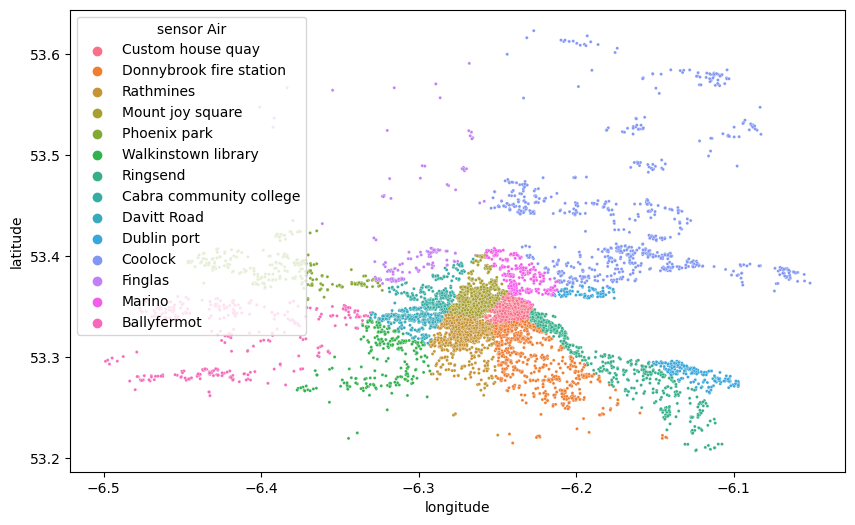

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns  


# Scatter plot with different colors for each category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=listings, x='longitude', y='latitude', hue='sensor Air', s=5)